# Deciding How Many Components To Use

> This is done by eyeballing the scree plot, and looking for a point at which the proportion of variance explained by each subsequent principal component drops off ... this type of visual analysis is inherently ad hoc. Unfortunately, there is no well-accepted objective way to decide how many principal components are enough.

- *An Introduction to Statistical Learning, pg. 384

In [1]:
cd ..

/home/samoht25/uclax-data-science/09-PCA-tutorial


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from lib.preprocessing import BoxCoxTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

In [3]:
X = pd.read_pickle('data/ames_features.p')
y = pd.read_pickle('data/ames_target.p')
display(X.head())
display(y[1:20])

,bedroomabvgr_0,bedroomabvgr_1,bedroomabvgr_2,bedroomabvgr_3,bedroomabvgr_4,bedroomabvgr_5,bedroomabvgr_6,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,...,masvnrarea,miscval,openporchsf,screenporch,secondflrsf,threessnporch,totalbsmtsf,wooddecksf,yearbuilt,yearremodadd
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,196.0,0.0,61.0,0.0,854.0,0.0,856.0,0.0,2003.0,2003.0
4,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,35.0,0.0,756.0,0.0,756.0,0.0,1915.0,1970.0
5,0,0,0,0,1,0,0,1,0,0,...,350.0,0.0,84.0,0.0,1053.0,0.0,1145.0,192.0,2000.0,2000.0
7,0,0,0,1,0,0,0,1,0,0,...,186.0,0.0,57.0,0.0,0.0,0.0,1686.0,255.0,2004.0,2005.0
8,0,0,0,1,0,0,0,1,0,0,...,240.0,350.0,204.0,0.0,983.0,0.0,1107.0,235.0,1973.0,1973.0


id
4     140000.0
5     250000.0
7     307000.0
8     200000.0
10    118000.0
12    345000.0
13    144000.0
14    279500.0
15    157000.0
17    149000.0
19    159000.0
20    139000.0
21    325300.0
23    230000.0
24    129900.0
25    154000.0
27    134800.0
28    306000.0
29    207500.0
Name: saleprice, dtype: float64

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

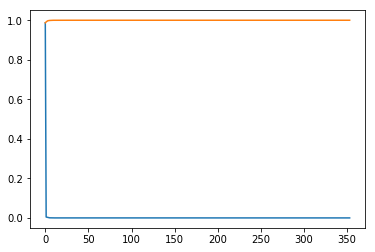

In [10]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_exp_var = np.cumsum(explained_var_ratio)

plt.plot(explained_var_ratio)
plt.plot(cumulative_exp_var)

### LESSON: The PCA is highly dependent upon scaled data

In [11]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler().fit_transform(X)
pca.fit(X_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

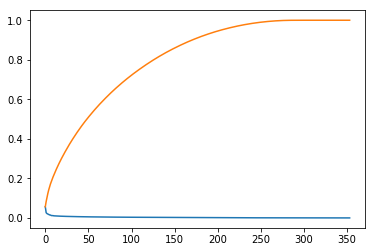

In [12]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_exp_var = np.cumsum(explained_var_ratio)
plt.plot(explained_var_ratio)
plt.plot(cumulative_exp_var)

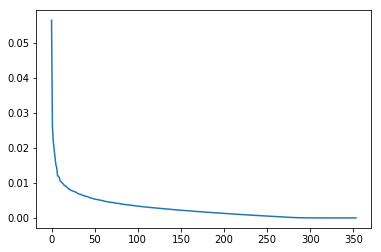

In [13]:
plt.plot(explained_var_ratio)

> [We are] looking for a point at which the proportion of variance explained by each subsequent principal component drops off. This is often referred to as an *elbow* in the scree plot.

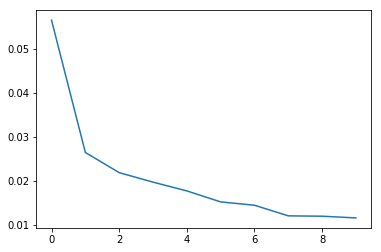

In [14]:
plt.plot(explained_var_ratio[:10])

> However, this type of visual analysis is inherently ad hoc. Unfortunately, there is no well-accepted objective way to decide how many principal components are enough. In fact, **the question of how many principal compo- nents are enough is inherently ill-defined**, and will depend on the specific area of application and the specific data set. In practice, we tend to look at the first few principal components in order to find interesting patterns in the data. If no interesting patterns are found in the first few principal components, then further principal components are unlikely to be of interest. Conversely, if the first few principal components are interesting, then we typically continue to look at subsequent principal components until no further interesting patterns are found. This is admittedly a subjective ap- proach, and is reflective of the fact that PCA is generally used as a tool for exploratory data analysis.